#### Disclaimer: While case study is real, data is modified for educational purposes. Description: This dataset represents the Stock Price of Google incorporation between 2013-2018 years. The data is presented in csv format as follows: Date, Open, High, Low, Close, Volume, Adj Close.
#### Dataset: google-data.csv
- Task: You are asked to create a model using Facebook Prophet predict closing stock prices for the
- next 100 days. Tune the hyperparameters using Bayesian Optimization.

#### Complete your work with following steps:
- 1. Name your final work script as “Google Stock Price Prediction”.
- 2. Create repository named “Time Series with Facebook Prophet” in your GitHub account and push your script to this repository.
- 3. Fork other users’ repositories, make pull requests (at least one, making three pull requests is desirable).

#### Note: Your pull requests should either fix problems or add new features.

Tapşırıq:

1. **Disclaimer**: Case study real olsa da, məlumatlar təhsil məqsədi üçün dəyişdirilib.
2. **Təsvir**: Bu dataset, Google şirkətinin 2013-2018 illəri arasındakı səhmlərinin qiymətini təmsil edir. Məlumat CSV formatında təqdim olunub və aşağıdakı sütunlardan ibarətdir: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`, `Adj Close`.
3. **Dataset**: `google-data.csv`
4. **Tapşırıq**: Sizdən Facebook Prophet istifadə edərək sonrakı 100 gün üçün bağlanış qiymətlərini (closing stock prices) proqnozlaşdırmaq üçün model qurmağınız tələb olunur. Hiperparametrləri **Bayesian Optimization** ilə optimallaşdırın.

Tamamlamaq üçün addımlar:
- Son iş faylınızı "Google Stock Price Prediction" kimi adlandırın.
- GitHub hesabınızda "Time Series with Facebook Prophet" adlı repository yaradın və script-i bu repository-ə yükləyin.
- Digər istifadəçilərin repository-lərini fork edin, pull request-lər edin (ən az bir, üç pull request etmək məqbuldur).
- **Qeyd**: Pull request-lər ya problemləri həll etməli, ya da yeni xüsusiyyətlər əlavə etməlidir.

---

### Datasetin Sütunları:

- **Date**: Tarixi göstərir. (Format: YYYY-MM-DD)
- **Open**: Göstərilən tarixdə səhmin açılış qiymətini göstərir.
- **High**: Göstərilən tarixdə səhmin ən yüksək qiymətini göstərir.
- **Low**: Göstərilən tarixdə səhmin ən aşağı qiymətini göstərir.
- **Close**: Göstərilən tarixdə səhmin bağlanış qiymətini göstərir.
- **Volume**: Göstərilən tarixdə alınıb-satılan səhmlərin həcmini göstərir.
- **Adj Close**: Göstərilən tarixdə səhmin düzəliş edilmiş bağlanış qiymətini göstərir, dividentlər və digər korporativ tədbirlərlə düzəliş olunur.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week10\google-data.csv')
# data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week10\google-data.csv', parse_dates=['Date'])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [3]:
import numpy as np
import pandas as pd 
import warnings
import itertools
import numpy as np
import random
import statsmodels.api as sm
from prophet import Prophet
from statsmodels.tsa. seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [4]:
import copy

df = copy.deepcopy(data)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


### 1. Check the Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### 2. Date column conert to datetime type

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


### 3. Missing Data

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### how much days in dataset

In [10]:
print(df.Date.min())
print(df.Date.max())

2013-01-02 00:00:00
2017-12-29 00:00:00


In [11]:
df.Date.max() - df.Date.min()

Timedelta('1822 days 00:00:00')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [13]:
y_cols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [14]:
results = [] 
models = []
for y_col in y_cols:
    df_to_be_predicted = df[['Date', y_col]] 
    df_to_be_predicted. columns = ['ds', 'y']
    
    model = Prophet(interval_width=0.95) 
    model.fit(df_to_be_predicted)
    
    future = model.make_future_dataframe(periods = 100, freq= 'D') 
    forecast = model.predict(future)
    
    results.append(forecast)
    models.append(model)

12:10:30 - cmdstanpy - INFO - Chain [1] start processing
12:10:32 - cmdstanpy - INFO - Chain [1] done processing
12:10:34 - cmdstanpy - INFO - Chain [1] start processing
12:10:36 - cmdstanpy - INFO - Chain [1] done processing
12:10:39 - cmdstanpy - INFO - Chain [1] start processing
12:10:40 - cmdstanpy - INFO - Chain [1] done processing
12:10:42 - cmdstanpy - INFO - Chain [1] start processing
12:10:43 - cmdstanpy - INFO - Chain [1] done processing
12:10:45 - cmdstanpy - INFO - Chain [1] start processing
12:10:47 - cmdstanpy - INFO - Chain [1] done processing
12:10:48 - cmdstanpy - INFO - Chain [1] start processing
12:10:49 - cmdstanpy - INFO - Chain [1] done processing


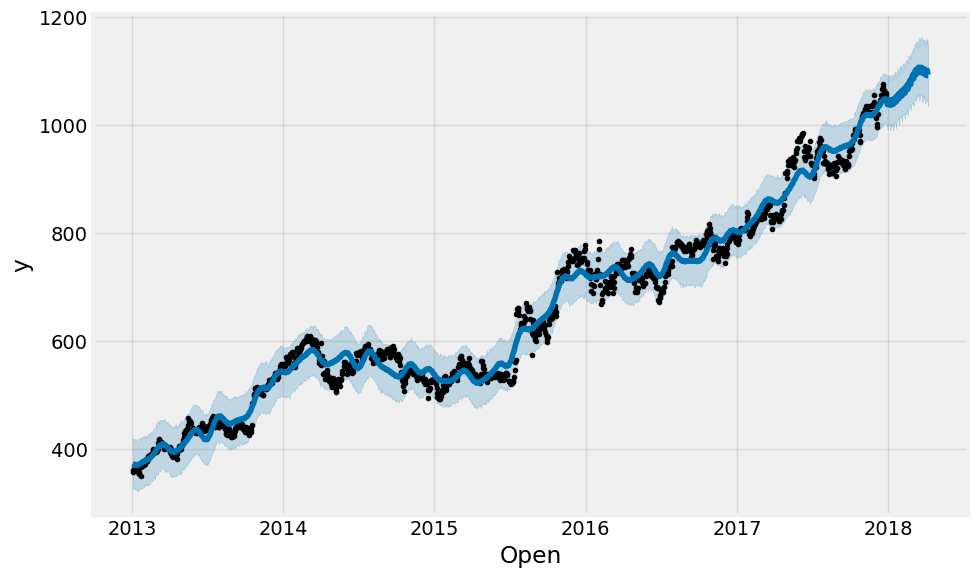

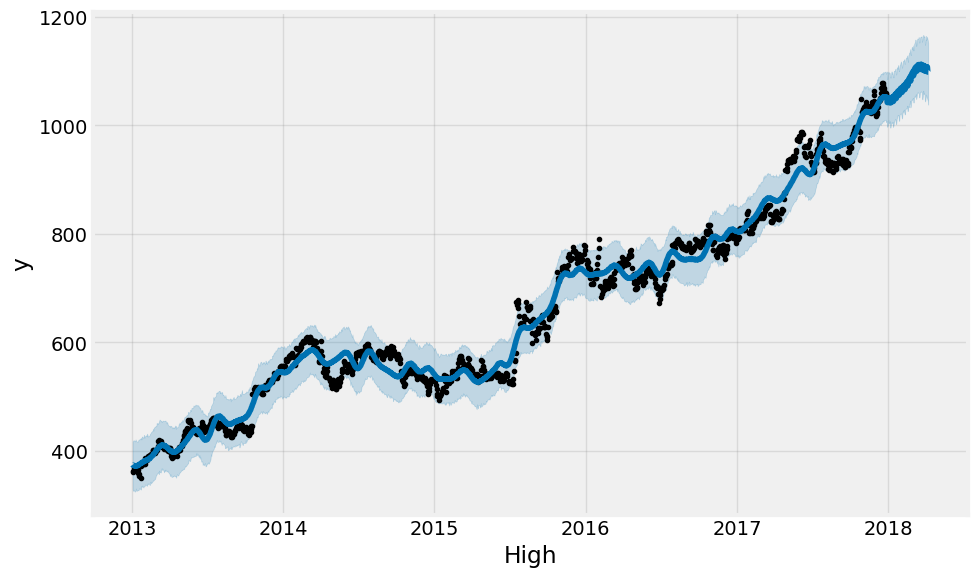

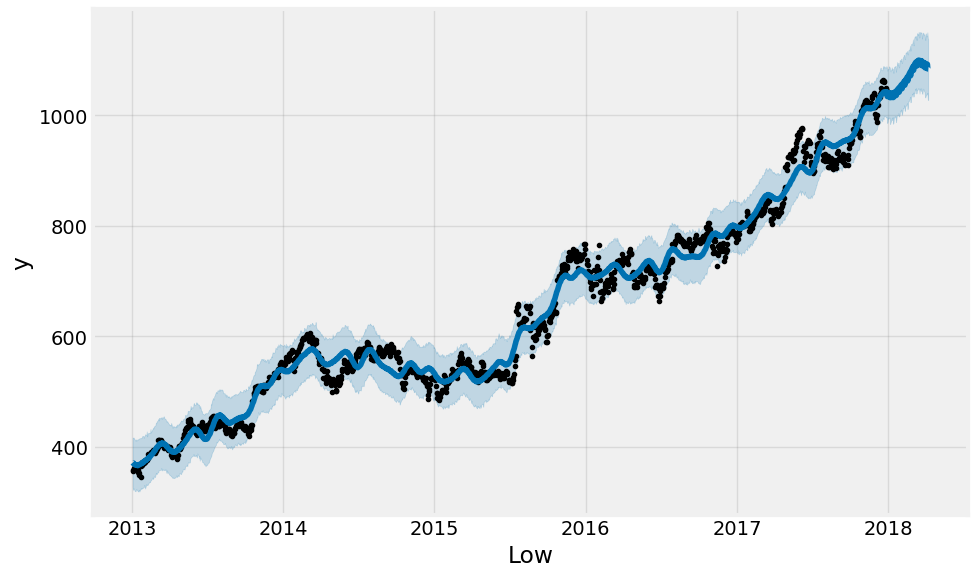

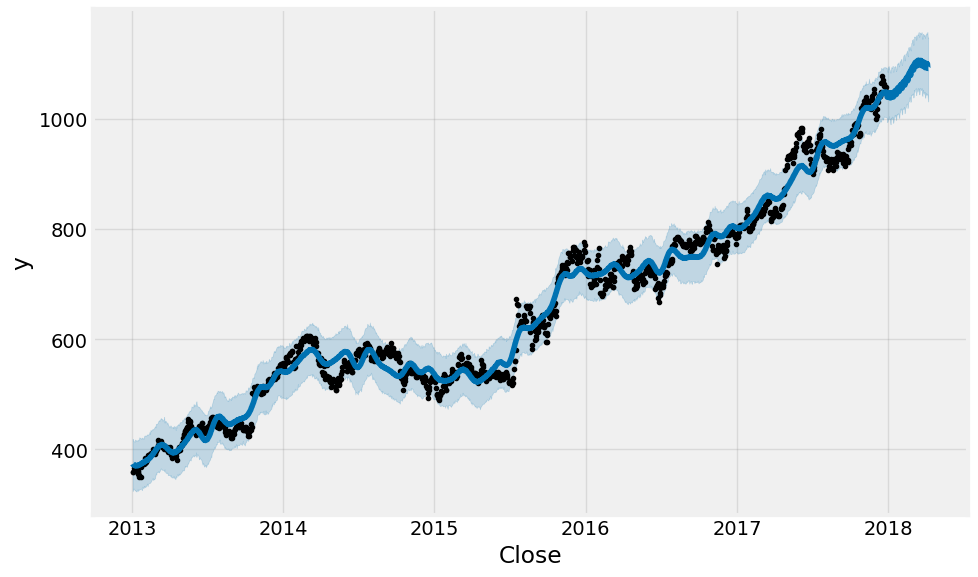

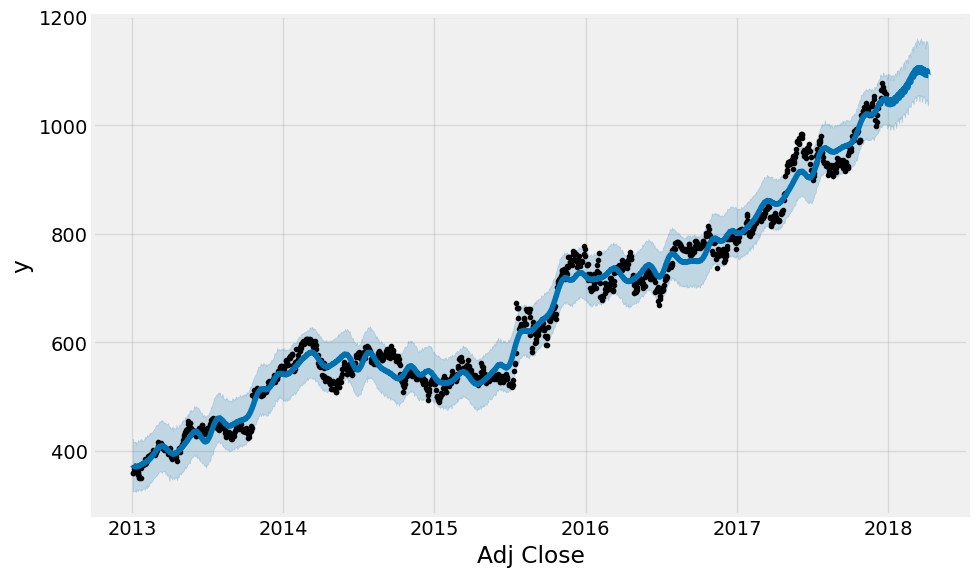

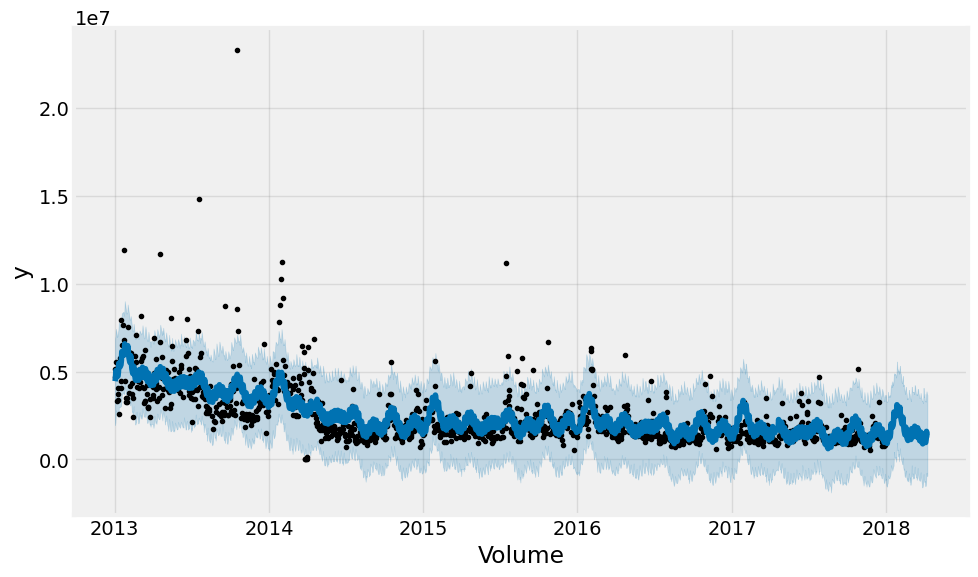

In [70]:
for mod, frcst, col in zip(models, results, y_cols):
    model = mod
    forecast = frcst
    model.plot(forecast, xlabel=col)

### CV and PM explanation

### CV 

In [16]:
from prophet.diagnostics import cross_validation
df_cvs = []
for model in models:
    df_cv = cross_validation(model, initial='1195 days', period='180 days', horizon='365 days')
    df_cvs.append(df_cv)

  0%|          | 0/2 [00:00<?, ?it/s]

12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:01 - cmdstanpy - INFO - Chain [1] done processing
12:11:02 - cmdstanpy - INFO - Chain [1] start processing
12:11:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

12:11:04 - cmdstanpy - INFO - Chain [1] start processing
12:11:05 - cmdstanpy - INFO - Chain [1] done processing
12:11:06 - cmdstanpy - INFO - Chain [1] start processing
12:11:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

12:11:09 - cmdstanpy - INFO - Chain [1] start processing
12:11:10 - cmdstanpy - INFO - Chain [1] done processing
12:11:11 - cmdstanpy - INFO - Chain [1] start processing
12:11:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

12:11:14 - cmdstanpy - INFO - Chain [1] start processing
12:11:15 - cmdstanpy - INFO - Chain [1] done processing
12:11:16 - cmdstanpy - INFO - Chain [1] start processing
12:11:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

12:11:19 - cmdstanpy - INFO - Chain [1] start processing
12:11:20 - cmdstanpy - INFO - Chain [1] done processing
12:11:21 - cmdstanpy - INFO - Chain [1] start processing
12:11:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

12:11:23 - cmdstanpy - INFO - Chain [1] start processing
12:11:24 - cmdstanpy - INFO - Chain [1] done processing
12:11:25 - cmdstanpy - INFO - Chain [1] start processing
12:11:26 - cmdstanpy - INFO - Chain [1] done processing


### PM

In [17]:
from prophet.diagnostics import performance_metrics

df_ps = []
for df_cv in df_cvs:
    df_p = performance_metrics (df_cv, rolling_window=2)

    df_ps.append(df_p)

### Perfomance Mertics

In [71]:
for col, m in zip(y_cols, df_ps):
    print(col)
    print(m)

Open
   horizon           mse        rmse       mae      mape    mdape     smape  \
0 365 days  11214.033448  105.896333  82.27684  0.088487  0.05704  0.094898   

   coverage  
0  0.850895  
High
   horizon           mse        rmse        mae      mape     mdape    smape  \
0 365 days  11698.407714  108.159178  83.637861  0.089276  0.055458  0.09588   

   coverage  
0  0.858847  
Low
   horizon          mse        rmse        mae      mape     mdape     smape  \
0 365 days  10584.94188  102.883147  80.469624  0.087305  0.060132  0.093354   

   coverage  
0   0.83499  
Close
   horizon           mse        rmse        mae      mape     mdape     smape  \
0 365 days  11307.136351  106.335019  82.830766  0.089084  0.057065  0.095521   

   coverage  
0  0.836978  
Adj Close
   horizon           mse        rmse        mae      mape     mdape     smape  \
0 365 days  11307.136351  106.335019  82.830766  0.089084  0.057065  0.095521   

   coverage  
0  0.840954  
Volume
   horizon      

### Proqnozdan sonra metrikləri əldə etmək:

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

for col, pred in zip(y_cols, results):
    y_true = df[col] # Hədəf dəyərləri (faktiki dəyərlər)
    y_pred = pred['yhat'][:len(df[col])] # Proqnozlaşdırılan dəyərlər
    
    #Performans metriklərini hesablayın
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)

    # Metrikləri göstərin
    print(col)
    print(f"R2 {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMAE: {rmse}")
    print()

Open
R2 0.9821224535073071
MAE: 19.187782005234833
MSE: 551.0145490238513
RMAE: 23.473699091192493

High
R2 0.9825853669180544
MAE: 19.10418763240587
MSE: 542.8570357156015
RMAE: 23.2992926011843

Low
R2 0.9818066599704662
MAE: 19.31011474437302
MSE: 555.0297820494455
RMAE: 23.559070059097103

Close
R2 0.9822087702088038
MAE: 19.230821515337514
MSE: 549.5438295309286
RMAE: 23.442351194599244

Adj Close
R2 0.9822087702088038
MAE: 19.230821515337514
MSE: 549.5438295309286
RMAE: 23.442351194599244

Volume
R2 0.4822839536787418
MAE: 729056.498696168
MSE: 1446445351466.997
RMAE: 1202682.56471398



### CV and PM explanation one Model

In [18]:
from prophet.diagnostics import cross_validation 
from prophet.diagnostics import performance_metrics

### CV 

In [28]:
model1 = models[0]
df_cv=cross_validation (model1, initial='100 days', period='10 days', horizon='20 days')

In [20]:
def df_info(df, name = 'ds'):
    print(df.shape)
    print(df[name].min())
    print(df[name].max())
    print(df[name].max() - df[name].min())

In [21]:
df_info(df, 'Date')

(1259, 7)
2013-01-02 00:00:00
2017-12-29 00:00:00
1822 days 00:00:00


In [22]:
df_info(df_cv)

(2363, 6)
2013-04-15 00:00:00
2017-12-29 00:00:00
1719 days 00:00:00


In [23]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-04-15,442.334125,434.905924,449.838929,390.435608,2013-04-14
1,2013-04-16,472.793091,465.973681,479.686297,390.753540,2013-04-14
2,2013-04-17,516.390735,509.788667,523.156207,390.833008,2013-04-14
3,2013-04-18,569.485630,562.369254,576.565235,390.137543,2013-04-14
4,2013-04-19,636.782510,630.206166,643.786384,382.094849,2013-04-14
...,...,...,...,...,...,...
2358,2017-12-22,1035.496874,990.692753,1082.224340,1061.109985,2017-12-09
2359,2017-12-26,1034.122258,987.870142,1080.797129,1058.069946,2017-12-09
2360,2017-12-27,1034.529648,986.723565,1082.369761,1057.390015,2017-12-09
2361,2017-12-28,1034.587156,991.629728,1080.397057,1051.599976,2017-12-09


In [24]:
df_cv.cutoff.nunique()

171

### PM

In [25]:
df_p = performance_metrics(df_cv, rolling_window=0.1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,841.780079,29.013447,21.493012,0.032775,0.025592,0.032573,0.665254
1,4 days,1028.061502,32.063398,23.302930,0.036789,0.029865,0.036369,0.652685
2,5 days,1326.198863,36.417013,24.473136,0.039843,0.028712,0.038972,0.661229
3,6 days,1310.800643,36.204981,24.599171,0.039889,0.026460,0.039375,0.656780
4,7 days,1321.539309,36.352982,26.150799,0.041543,0.029159,0.042016,0.628579
5,8 days,2951.825542,54.330705,31.277892,0.051935,0.032346,0.050688,0.594850
6,9 days,5715.424922,75.600429,38.059998,0.067184,0.036484,0.062552,0.545975
7,10 days,8890.913661,94.291642,44.321255,0.080703,0.038147,0.073814,0.521186
8,11 days,12539.185842,111.978506,48.431956,0.089049,0.035669,0.078260,0.540326
9,12 days,17292.811351,131.502134,51.288832,0.095562,0.038987,0.079859,0.529876


In [26]:
df_p = performance_metrics(df_cv, rolling_window=0)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,707.297832,26.595072,19.217590,0.028386,0.021559,0.028247,0.735043
1,2 days,822.779115,28.684127,21.040593,0.031847,0.023856,0.031748,0.675214
2,3 days,860.461700,29.333627,21.937826,0.033688,0.026236,0.033384,0.655462
3,4 days,1190.074645,34.497459,24.622530,0.039786,0.032177,0.039254,0.650000
4,5 days,1460.035279,38.210408,24.326252,0.039898,0.024899,0.038695,0.672269
5,6 days,1159.014988,34.044309,24.876755,0.039879,0.027807,0.040068,0.641026
6,7 days,1481.696177,38.492807,27.456031,0.043234,0.030640,0.044021,0.615385
7,8 days,4372.950594,66.128289,34.972356,0.060346,0.035730,0.057133,0.575000
8,9 days,7057.899251,84.011304,41.147639,0.074021,0.038327,0.067970,0.516949
9,10 days,10723.928071,103.556400,47.494871,0.087385,0.036649,0.079657,0.525424


In [27]:
df_p = performance_metrics(df_cv, rolling_window=1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,20 days,36021.993923,189.79461,51.416081,0.097051,0.034248,0.07793,0.548455


### Proqnozdan sonra metrikləri əldə etmək:

In [37]:
results[0]['yhat'][:len(df['Close'])]

0        373.706137
1        372.387935
2        372.312506
3        370.617047
4        370.695871
           ...     
1254    1047.782023
1255    1047.798557
1256    1048.226309
1257    1047.258922
1258    1047.457706
Name: yhat, Length: 1259, dtype: float64

In [38]:
df['Close']

0        359.288177
1        359.496826
2        366.600616
3        365.001007
4        364.280701
           ...     
1254    1060.119995
1255    1056.739990
1256    1049.369995
1257    1048.140015
1258    1046.400024
Name: Close, Length: 1259, dtype: float64

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# MAE və MSE hesablamaq üçün faktiki dəyərlər və proqnozlar
y_true = df['Open']  # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = results[3]['yhat'][:len(df['Open'])]  # Proqnozlaşdırılan dəyərlər

# Performans metriklərini hesablayın
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)

# Metrikləri göstərin
print(f"R2 {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMAE: {rmse}")

R2 0.9819526291204925
MAE: 19.24796683442296
MSE: 556.2488079839443
RMAE: 23.584927559438132
